# INNOVA INSTALL FUTURE HACKATHON - Predicting CPULoad  

In [1]:
# import required libraries
import pandas as pd # import required libraries
pd.set_option("display.max_columns",100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import time

In [2]:
df = pd.read_csv("./data/train.csv") #Reading train data from csv file

In [3]:
df.shape

(312696, 4)

# EDA - Exploratory Data Analysis

In [4]:
df.head(10)

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28
5,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-13,1.99
6,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-14,0.57
7,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-15,0.35
8,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-16,0.64
9,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-17,0.36


In [5]:
df.sample(10)

,DATETIME,SERVER,CPU,CPULOAD
311935,2020-05-30 20:00:00+03:00,CIHAZ_301,CPU-15,1.18
60294,2020-04-06 03:15:00+03:00,CIHAZ_305,CPU-14,1.01
23486,2020-03-29 02:30:00+03:00,CIHAZ_301,CPU-21,0.22
251933,2020-05-17 19:00:00+03:00,CIHAZ_305,CPU-13,6.79
137513,2020-04-22 22:00:00+03:00,CIHAZ_305,CPU-3,19.42
83336,2020-04-11 03:45:00+03:00,CIHAZ_305,CPU-16,0.84
279782,2020-05-23 20:15:00+03:00,CIHAZ_305,CPU-21,4.14
198380,2020-05-06 03:45:00+03:00,CIHAZ_301,CPU-6,3.31
153250,2020-04-26 08:15:00+03:00,CIHAZ_305,CPU-18,0.64
112511,2020-04-17 11:45:00+03:00,CIHAZ_305,CPU-9,33.84


In [6]:
df.info() #Give information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312696 entries, 0 to 312695
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DATETIME  312696 non-null  object 
 1   SERVER    312696 non-null  object 
 2   CPU       312696 non-null  object 
 3   CPULOAD   312696 non-null  float64
dtypes: float64(1), object(3)
memory usage: 9.5+ MB


In [7]:
df.isnull().sum() # Detect missing values

DATETIME    0
SERVER      0
CPU         0
CPULOAD     0
dtype: int64

In [8]:
df.SERVER.value_counts()

CIHAZ_301    156360
CIHAZ_305    156336
Name: SERVER, dtype: int64

In [9]:
df.CPU.value_counts()

CPU-0     13029
CPU-1     13029
CPU-8     13029
CPU-7     13029
CPU-6     13029
CPU-5     13029
CPU-4     13029
CPU-3     13029
CPU-23    13029
CPU-22    13029
CPU-21    13029
CPU-20    13029
CPU-2     13029
CPU-19    13029
CPU-18    13029
CPU-17    13029
CPU-16    13029
CPU-15    13029
CPU-14    13029
CPU-13    13029
CPU-12    13029
CPU-11    13029
CPU-10    13029
CPU-9     13029
Name: CPU, dtype: int64

## Data Visualization - Feature Engineering

In [10]:
 df=df.groupby(['SERVER','DATETIME'],as_index=False).agg({'CPULOAD': lambda x: x.mean()}) 
#Groupby averaging CPUloads by datetime and server

In [11]:
df

,SERVER,DATETIME,CPULOAD
0,CIHAZ_301,2020-03-24 00:00:00+03:00,4.425000
1,CIHAZ_301,2020-03-24 00:15:00+03:00,4.427500
2,CIHAZ_301,2020-03-24 00:30:00+03:00,3.910417
3,CIHAZ_301,2020-03-24 00:45:00+03:00,3.633750
4,CIHAZ_301,2020-03-24 01:00:00+03:00,3.575000
...,...,...,...
13024,CIHAZ_305,2020-05-30 22:45:00+03:00,13.932917
13025,CIHAZ_305,2020-05-30 23:00:00+03:00,10.920833
13026,CIHAZ_305,2020-05-30 23:15:00+03:00,10.177917
13027,CIHAZ_305,2020-05-30 23:30:00+03:00,9.696667


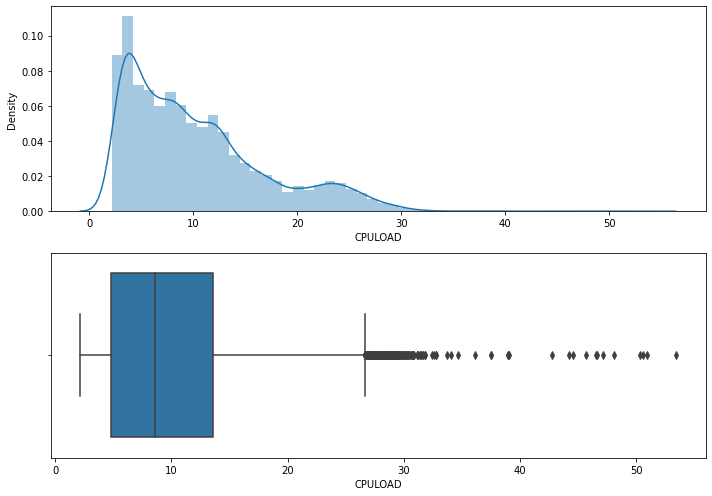

In [12]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['CPULOAD']) #Show distplot to see which CPULOAD have more densit
fig.add_subplot(2,1,2)
sns.boxplot(df['CPULOAD']) # Show CPULOAD as boxplot to see outliers and common CPULOAD range
plt.tight_layout()

In [13]:
df['CPULOAD'].mean()

10.283953680251756

In [14]:
#See CPULOAD quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)
print(Q3)

CPULOAD    8.7375
dtype: float64
CPULOAD    13.5425
Name: 0.75, dtype: float64


In [15]:
df['CPULOAD'].mean()+3*df['CPULOAD'].std()

30.415451153289823

In [16]:
# Remove outliers
#df=df[df['CPULOAD']<(df['CPULOAD'].mean()+3*df['CPULOAD'].std())]
#df=df[df['CPULOAD']<28]

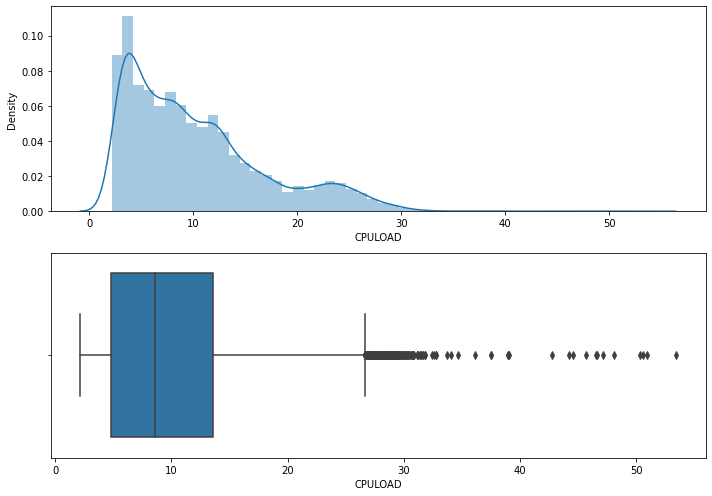

In [17]:
#Distribution after removing outliers
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['CPULOAD']) 
fig.add_subplot(2,1,2)
sns.boxplot(df['CPULOAD']) 
plt.tight_layout()

In [18]:
df['DATETIME']=pd.to_datetime(df['DATETIME'])
#Creates a new column named day,month,hour, minute and pulls the day,month,hour, minute from the date column
#df['DAY'] = (df['DATETIME']).dt.day 
#df['MONTH'] = (df['DATETIME']).dt.month 
df['HOUR'] = (df['DATETIME']).dt.hour 
df['MINUTE'] = (df['DATETIME']).dt.minute 
#df["DAY"]=df["DAY"].astype(np.int)
#df["MONTH"]=df["MONTH"].astype(np.int)
#df["HOUR"]=time(hour= df["HOUR"],minute=df["MINUTE"])
df["HOUR"]=df["HOUR"].astype(np.object)
df["MINUTE"]=df["MINUTE"].astype(np.object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13029 entries, 0 to 13028
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype                                
---  ------    --------------  -----                                
 0   SERVER    13029 non-null  object                               
 1   DATETIME  13029 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   CPULOAD   13029 non-null  float64                              
 3   HOUR      13029 non-null  object                               
 4   MINUTE    13029 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), float64(1), object(3)
memory usage: 509.1+ KB


<AxesSubplot:xlabel='MINUTE', ylabel='CPULOAD'>

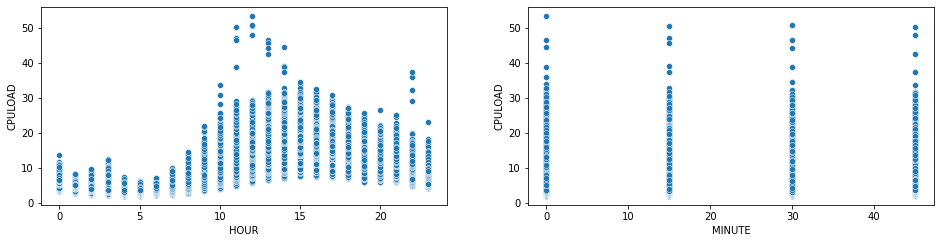

In [20]:
fig = plt.figure(figsize=(16,8))
#Show scatter plot to see intensity and relationship between hour, minute and CPULOAD
fig.add_subplot(2,2,1)
sns.scatterplot(df['HOUR'], df['CPULOAD'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['MINUTE'], df['CPULOAD'])


## Anomaly Detection (Robust Covariance)

In [21]:
from sklearn.covariance import EllipticEnvelope
random_state = np.random.RandomState(42)
Env_model = EllipticEnvelope(random_state=random_state).fit(df[['CPULOAD']])
# predict returns 1 for an inlier and -1 for an outlier
df['scores'] = Env_model.decision_function(df[['CPULOAD']])
df['anomaly_score'] = Env_model.predict(df[['CPULOAD']])
df[df['anomaly_score']==-1]

,SERVER,DATETIME,CPULOAD,HOUR,MINUTE,scores,anomaly_score
5890,CIHAZ_301,2020-05-24 11:30:00+03:00,21.688750,11,30,-1.184911,-1
5891,CIHAZ_301,2020-05-24 11:45:00+03:00,23.526250,11,45,-5.043177,-1
5892,CIHAZ_301,2020-05-24 12:00:00+03:00,24.563333,12,0,-7.430817,-1
5893,CIHAZ_301,2020-05-24 12:15:00+03:00,22.832083,12,15,-3.529692,-1
5894,CIHAZ_301,2020-05-24 12:30:00+03:00,23.965833,12,30,-6.036709,-1
...,...,...,...,...,...,...,...
12996,CIHAZ_305,2020-05-30 15:45:00+03:00,21.875833,15,45,-1.555982,-1
12997,CIHAZ_305,2020-05-30 16:00:00+03:00,21.733333,16,0,-1.272892,-1
12998,CIHAZ_305,2020-05-30 16:15:00+03:00,21.506250,16,15,-0.827682,-1
12999,CIHAZ_305,2020-05-30 16:30:00+03:00,21.374583,16,30,-0.572870,-1


## Isolation Forest

In [22]:
#from sklearn.ensemble import IsolationForest
#random_state = np.random.RandomState(42)
#model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
#model.fit(df[['CPULOAD']])

#df['scores'] = model.decision_function(df[['CPULOAD']])
#df['anomaly_score'] = model.predict(df[['CPULOAD']])
#df[df['anomaly_score']==-1]

<AxesSubplot:ylabel='CPULOAD'>

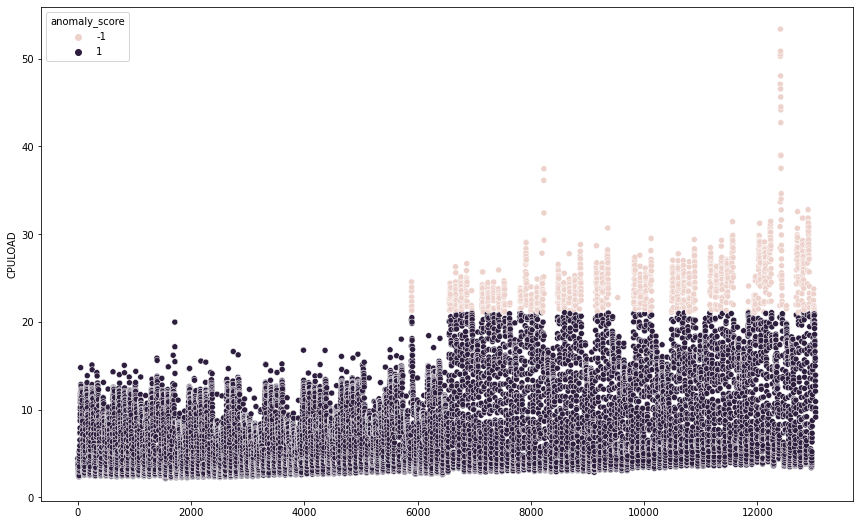

In [23]:
fig = plt.figure(figsize=(32,20))
fig.add_subplot(2,2,1)
sns.scatterplot(df['CPULOAD'].index, df['CPULOAD'],hue=df['anomaly_score'])

In [24]:
df=df[df['anomaly_score']==1] #Removing anomalies

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11726 entries, 0 to 13028
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype                                
---  ------         --------------  -----                                
 0   SERVER         11726 non-null  object                               
 1   DATETIME       11726 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   CPULOAD        11726 non-null  float64                              
 3   HOUR           11726 non-null  object                               
 4   MINUTE         11726 non-null  object                               
 5   scores         11726 non-null  float64                              
 6   anomaly_score  11726 non-null  int32                                
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), float64(2), int32(1), object(3)
memory usage: 687.1+ KB


In [26]:
df.drop(['DATETIME'],axis=1,inplace=True)

## Regression-Machine Learning

In [27]:
x,y=df[['SERVER','HOUR','MINUTE']],df['CPULOAD'] #Assigning CPULOAD-influencing columns for training 

In [28]:
x

,SERVER,HOUR,MINUTE
0,CIHAZ_301,0,0
1,CIHAZ_301,0,15
2,CIHAZ_301,0,30
3,CIHAZ_301,0,45
4,CIHAZ_301,1,0
...,...,...,...
13024,CIHAZ_305,22,45
13025,CIHAZ_305,23,0
13026,CIHAZ_305,23,15
13027,CIHAZ_305,23,30


In [29]:
y

0         4.425000
1         4.427500
2         3.910417
3         3.633750
4         3.575000
           ...    
13024    13.932917
13025    10.920833
13026    10.177917
13027     9.696667
13028     9.147917
Name: CPULOAD, Length: 11726, dtype: float64

In [30]:
#Dummy variable: get_dummies writes strings in int format so we can give them to the model
x = pd.get_dummies(x)
x

,SERVER_CIHAZ_301,SERVER_CIHAZ_305,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,MINUTE_0,MINUTE_15,MINUTE_30,MINUTE_45
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
13025,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
13026,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
13027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11726 entries, 0 to 13028
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SERVER_CIHAZ_301  11726 non-null  uint8
 1   SERVER_CIHAZ_305  11726 non-null  uint8
 2   HOUR_0            11726 non-null  uint8
 3   HOUR_1            11726 non-null  uint8
 4   HOUR_2            11726 non-null  uint8
 5   HOUR_3            11726 non-null  uint8
 6   HOUR_4            11726 non-null  uint8
 7   HOUR_5            11726 non-null  uint8
 8   HOUR_6            11726 non-null  uint8
 9   HOUR_7            11726 non-null  uint8
 10  HOUR_8            11726 non-null  uint8
 11  HOUR_9            11726 non-null  uint8
 12  HOUR_10           11726 non-null  uint8
 13  HOUR_11           11726 non-null  uint8
 14  HOUR_12           11726 non-null  uint8
 15  HOUR_13           11726 non-null  uint8
 16  HOUR_14           11726 non-null  uint8
 17  HOUR_15           11726 non-nul

In [32]:
#Regressin models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
#Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [33]:
# PURPOSE: Train the data in 8 regression models and see the results in tabular form
# PARAMETERS: x: Dataframe containing training data, y: Output variable 
# RETURN: Show model evaluation metrics in ascending order by R_squared
def algo_testing(x, y): 
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    rf = RandomForestRegressor()
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13) 
    algos = [L, E, R, Lass, ETR, GBR, XGBC,rf]
    algo_names = ["Linear","ElasticNet", "Ridge","Lasso","Extra Tree","Gradient Boosting","XGradientBoosting","Random Forest"]
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns=["R_Squared","RMSE","MAE"],
                          index = algo_names) 
    for algo in algos:
        algo.fit(x_train,y_train) #Learning from training data with fit. Model learns by looking at x_train data versus y_train data
        algo.predict(x_test)     #Trained model predicts the output for the test data with predict command
        #Calculate model evaluation metrics
        r_squared.append(r2_score(y_test,algo.predict(x_test))) 
        rmse.append(mean_squared_error(y_test,algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test,algo.predict(x_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending = False)

In [34]:
algo_testing(x,y)

,R_Squared,RMSE,MAE
Random Forest,0.856474,1.764112,1.281109
XGradientBoosting,0.856402,1.764549,1.281312
Extra Tree,0.856372,1.764735,1.281598
Gradient Boosting,0.817162,1.991101,1.511422
Ridge,0.801715,2.073506,1.626611
Linear,0.801663,2.073775,1.627682
ElasticNet,0.029654,4.586946,3.842000
Lasso,-0.000383,4.657398,3.881776


In [35]:
df_test = pd.read_csv("./data/test.csv",index_col='index') #Reading test data from csv file

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DATETIME  192 non-null    object
 1   SERVER    192 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [37]:
df_test['DATETIME']=pd.to_datetime(df_test['DATETIME'])
#Creates a new column named hour, minute and pulls the day,month,hour, minute from the date column
df_test['HOUR'] = (df_test['DATETIME']).dt.hour
df_test['MINUTE'] = (df_test['DATETIME']).dt.minute

df_test["HOUR"]=df_test["HOUR"].astype(np.object)
df_test["MINUTE"]=df_test["MINUTE"].astype(np.object)

In [38]:
df_test.drop(['DATETIME'],axis=1,inplace=True)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SERVER  192 non-null    object
 1   HOUR    192 non-null    object
 2   MINUTE  192 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [40]:
df_test = pd.get_dummies(df_test)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SERVER_CIHAZ_301  192 non-null    uint8
 1   SERVER_CIHAZ_305  192 non-null    uint8
 2   HOUR_0            192 non-null    uint8
 3   HOUR_1            192 non-null    uint8
 4   HOUR_2            192 non-null    uint8
 5   HOUR_3            192 non-null    uint8
 6   HOUR_4            192 non-null    uint8
 7   HOUR_5            192 non-null    uint8
 8   HOUR_6            192 non-null    uint8
 9   HOUR_7            192 non-null    uint8
 10  HOUR_8            192 non-null    uint8
 11  HOUR_9            192 non-null    uint8
 12  HOUR_10           192 non-null    uint8
 13  HOUR_11           192 non-null    uint8
 14  HOUR_12           192 non-null    uint8
 15  HOUR_13           192 non-null    uint8
 16  HOUR_14           192 non-null    uint8
 17  HOUR_15           192 non-null    u

In [42]:
df_test

,SERVER_CIHAZ_301,SERVER_CIHAZ_305,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,MINUTE_0,MINUTE_15,MINUTE_30,MINUTE_45
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
188,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
189,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [43]:
df_test.shape

(192, 30)

In [44]:
x.shape

(11726, 30)

In [45]:
#Use XGBRegressor as the most efficient estimates are obtained in XGBRegressor model
xgb = XGBRegressor()
model = xgb.fit(x, y)
pred = model.predict(df_test)

In [46]:
pred

array([ 5.2105317,  8.57806  ,  5.0433407,  7.7861867,  4.4583845,
        7.0009813,  4.3274894,  6.644546 ,  4.01425  ,  6.083858 ,
        3.8369398,  5.675628 ,  3.6593027,  5.382898 ,  3.571058 ,
        5.5941668,  3.6268413,  5.087495 ,  3.4857924,  4.967112 ,
        3.5687015,  4.985267 ,  3.497279 ,  5.128152 ,  3.7181075,
        9.040431 ,  3.344433 ,  4.7954392,  3.2121212,  4.492539 ,
        3.2211916,  4.408793 ,  2.9293323,  4.115317 ,  2.9514587,
        3.8189378,  2.7535584,  3.6359115,  2.9434304,  3.7576947,
        2.6776364,  3.5859175,  2.945153 ,  3.5641046,  2.71935  ,
        3.5877852,  2.8992841,  3.8026001,  2.893012 ,  3.7268097,
        2.9699779,  3.9568875,  3.19371  ,  4.235271 ,  3.4202075,
        4.721909 ,  3.639109 ,  4.944647 ,  3.8220294,  5.463042 ,
        4.2537823,  5.9499874,  4.393599 ,  6.535893 ,  4.6739116,
        7.1179123,  4.8763685,  7.497356 ,  5.0055933,  8.017328 ,
        5.531811 ,  8.8902025,  6.028822 , 10.460718 ,  6.4942

In [47]:
# PURPOSE: Create regression chart
# PARAMETERS: pred:Predictions based on test data
# RETURN:N/A
def chart_regression(pred, sort=True):
    t = pd.DataFrame({'pred':pred})
    
  
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

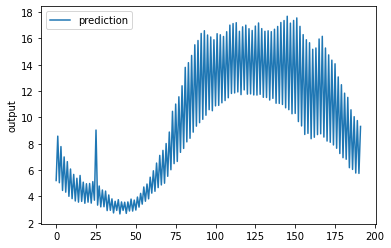

In [48]:
chart_regression(pred.flatten())

## Submission - ML

In [49]:
df_test['CPULOAD']=pred

In [50]:
submission=df_test[['CPULOAD']]

In [51]:
submission

,CPULOAD
index,
0,5.210532
1,8.578060
2,5.043341
3,7.786187
4,4.458385
...,...
187,10.054556
188,5.779515
189,9.760316


In [52]:
submission.to_csv("submission_ML4_RobustCovariance.csv")

## Tensorflow-Deep Learning

In [53]:
#Creating a Neural Network Model
model = Sequential()
model.add(Dense(30, activation = 'relu')) # Activation faction=relu(rectifier linear unit) 
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [54]:
#Fitting the model
model.fit(x=x, y=y,epochs=150, batch_size=216)
model.summary()

Epoch 1/150
55/55 [==============================] - 0s 1ms/step - loss: 82.0232
Epoch 2/150
55/55 [==============================] - 0s 1ms/step - loss: 27.3749
Epoch 3/150
55/55 [==============================] - 0s 1ms/step - loss: 11.6075
Epoch 4/150
55/55 [==============================] - 0s 1ms/step - loss: 6.3275
Epoch 5/150
55/55 [==============================] - 0s 1ms/step - loss: 4.0842
Epoch 6/150
55/55 [==============================] - 0s 1ms/step - loss: 3.5782
Epoch 7/150
55/55 [==============================] - 0s 1ms/step - loss: 3.4399
Epoch 8/150
55/55 [==============================] - 0s 1ms/step - loss: 3.3710
Epoch 9/150
55/55 [==============================] - 0s 1ms/step - loss: 3.3207
Epoch 10/150
55/55 [==============================] - 0s 1ms/step - loss: 3.2943
Epoch 11/150
55/55 [==============================] - 0s 1ms/step - loss: 3.2668
Epoch 12/150
55/55 [==============================] - 0s 1ms/step - loss: 3.2543
Epoch 13/150
55/55 [==============

55/55 [==============================] - 0s 2ms/step - loss: 3.1520
Epoch 102/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1478
Epoch 103/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1497
Epoch 104/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1381
Epoch 105/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1437
Epoch 106/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1355
Epoch 107/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1375
Epoch 108/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1366
Epoch 109/150
55/55 [==============================] - 0s 2ms/step - loss: 3.1404
Epoch 110/150
55/55 [==============================] - 0s 1ms/step - loss: 3.1432
Epoch 111/150
55/55 [==============================] - 0s 1ms/step - loss: 3.1754
Epoch 112/150
55/55 [==============================] - 0s 1ms/step - loss: 3.1460
Epoch 113/150
55/55 [=========

<AxesSubplot:>

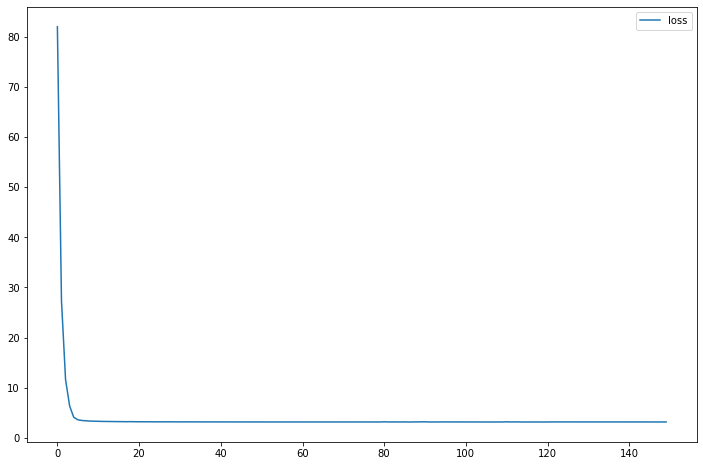

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [56]:
del df_test['CPULOAD']

In [57]:
pred_dl = model.predict(df_test)

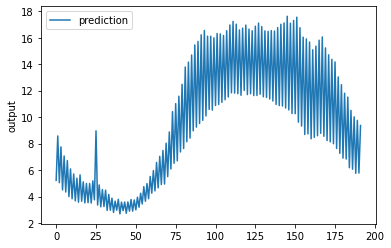

In [58]:
chart_regression(pred_dl.flatten())

## Submission - DL

In [59]:
df_test['CPULOAD']=pred_dl

In [60]:
submission_dl=df_test[['CPULOAD']]

In [61]:
submission_dl

,CPULOAD
index,
0,5.220681
1,8.576333
2,5.045500
3,7.748991
4,4.499472
...,...
187,10.019727
188,5.756521
189,9.753981


In [62]:
submission_dl.to_csv("submission_DL4.csv")